# 1. Import Library

Using TensorFlow backend.


# 数据准备

In [9]:
from keras.datasets import cifar10
import numpy as np
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [10]:
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [11]:
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [12]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [13]:
print(y_label_train_OneHot.shape)
print(y_label_train_OneHot[:5])

(50000, 10)
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


# 建立模型

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
model = Sequential()
#建立卷积层1,输入图像大小32*32
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(32, 32,3), 
                 activation='relu',padding='same'))
#加入Dropout
model.add(Dropout(rate=0.25))
#建立池化层1
model.add(MaxPooling2D(pool_size=(2, 2)))
#建立卷积层2
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
#加入Dropout
model.add(Dropout(0.25))
#建立池化层2
model.add(MaxPooling2D(pool_size=(2, 2)))
#建立平坦层
model.add(Flatten())
#加入Dropout
model.add(Dropout(rate=0.25))
#建立隐藏层
model.add(Dense(1024, activation='relu'))
#加入Dropout
model.add(Dropout(rate=0.25))
#建立输出层
model.add(Dense(10, activation='softmax'))

In [17]:
#Step3	建立神经网络(平坦层、隐藏层、输出层)

In [15]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

# 加载之前训练的模型

In [22]:
try:
    model.load_weights("SaveModel/cifarCnnModelnew1.h5")
    print("加载模型成功!继续训练模型")
except :    
    print("加载模型失败!开始训练一个新模型")

加载模型失败!开始训练一个新模型


# 训练模型

In [16]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [17]:
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=10, batch_size=128, verbose=1)          

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 221s 6ms/step - loss: 1.5936 - acc: 0.4280 - val_loss: 1.3579 - val_acc: 0.5429
Epoch 2/10
40000/40000 [==============================] - 208s 5ms/step - loss: 1.1990 - acc: 0.5767 - val_loss: 1.1924 - val_acc: 0.5960
Epoch 3/10
40000/40000 [==============================] - 213s 5ms/step - loss: 1.0538 - acc: 0.6270 - val_loss: 1.0416 - val_acc: 0.6686
Epoch 4/10
40000/40000 [==============================] - 210s 5ms/step - loss: 0.9395 - acc: 0.6669 - val_loss: 0.9944 - val_acc: 0.6869
Epoch 5/10
40000/40000 [==============================] - 210s 5ms/step - loss: 0.8509 - acc: 0.7020 - val_loss: 0.9693 - val_acc: 0.6788
Epoch 6/10
40000/40000 [==============================] - 227s 6ms/step - loss: 0.7640 - acc: 0.7309 - val_loss: 0.8799 - val_acc: 0.7174
Epoch 7/10
40000/40000 [==============================] - 183s 5ms/step - loss: 0.6901 - acc: 0.7579 - val_loss: 0.8488 - 

In [18]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

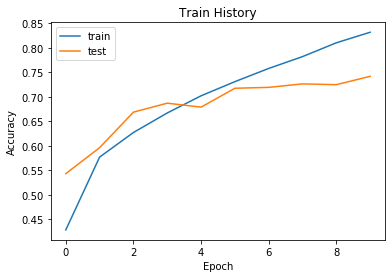

In [19]:
show_train_history('acc','val_acc')

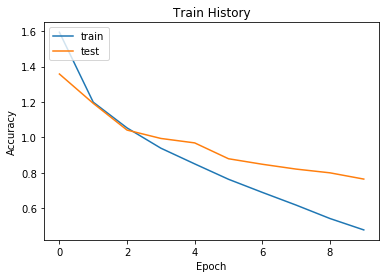

In [20]:
show_train_history('loss','val_loss')

# 评估模型的准确率

In [21]:
scores = model.evaluate(x_img_test_normalize, 
                        y_label_test_OneHot, verbose=0)
scores[1]

0.7352

# 进行预测

In [22]:
prediction=model.predict_classes(x_img_test_normalize)

In [23]:
prediction[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=int64)

# 查看预测结果

In [24]:
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
            5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

In [25]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')
                
        title=str(i)+','+label_dict[labels[i][0]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[i]]
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

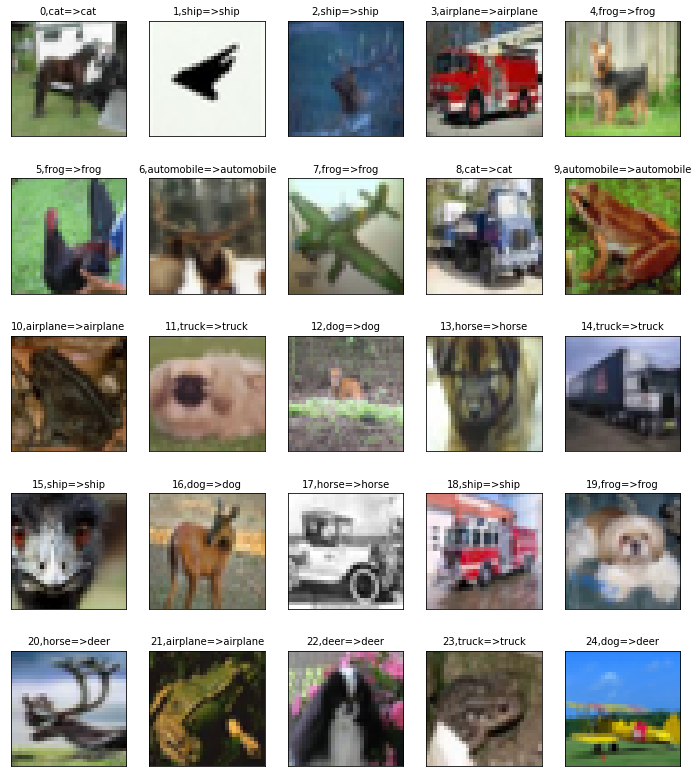

In [29]:
plot_images_labels_prediction(x_img_test,y_label_test,
                              prediction,20,40)

# 查看预测概率

In [30]:
Predicted_Probability=model.predict(x_img_test_normalize)

In [31]:
def show_Predicted_Probability(y,prediction,
                               x_img,Predicted_Probability,i):
    print('label:',label_dict[y[i][0]],
          'predict:',label_dict[prediction[i]])
    plt.figure(figsize=(2,2))
    plt.imshow(np.reshape(x_img_test[i],(32, 32,3)))
    plt.show()
    for j in range(10):
        print(label_dict[j]+
              ' Probability:%1.9f'%(Predicted_Probability[i][j]))

label: cat predict: cat


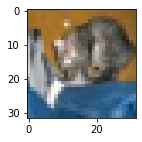

airplane Probability:0.001212501
automobile Probability:0.005048339
bird Probability:0.002015128
cat Probability:0.819681168
deer Probability:0.001312125
dog Probability:0.148376912
frog Probability:0.001076718
horse Probability:0.000923077
ship Probability:0.018333757
truck Probability:0.002020348


In [32]:
show_Predicted_Probability(y_label_test,prediction,
                           x_img_test,Predicted_Probability,0)

label: horse predict: deer


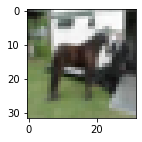

airplane Probability:0.084685601
automobile Probability:0.085753739
bird Probability:0.025651244
cat Probability:0.219371825
deer Probability:0.273784131
dog Probability:0.032510079
frog Probability:0.000138847
horse Probability:0.260789543
ship Probability:0.006445847
truck Probability:0.010869170


In [40]:
show_Predicted_Probability(y_label_test,prediction,
                           x_img_test,Predicted_Probability,20)

# confusion matrix

In [45]:
print(prediction.shape)

(10000,)


In [46]:
print(y_label_test.shape)

(10000, 1)


In [47]:
print(y_label_test)

[[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]


In [48]:
print(y_label_test.reshape(-1))

[3 8 8 ... 5 1 7]


In [52]:
import pandas as pd
pd.crosstab(y_label_test.reshape(-1),prediction,
            rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,775,16,31,14,27,16,9,11,67,34
1,15,826,4,10,5,11,10,4,24,91
2,63,4,584,59,142,64,37,27,14,6
3,17,12,44,547,111,171,53,28,7,10
4,14,2,38,41,794,31,26,43,9,2
5,11,2,35,161,72,640,21,48,5,5
6,4,5,46,65,61,23,786,4,5,1
7,11,0,19,33,81,60,7,781,4,4
8,58,36,11,15,19,10,5,2,824,20


In [54]:
print(label_dict)

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


# Save model to JSON

In [44]:
model_json = model.to_json()
with open("SaveModel/cifarCnnModelnew.json", "w") as json_file:
    json_file.write(model_json)

# Save Model to YAML

In [45]:
model_yaml = model.to_yaml()
with open("SaveModel/cifarCnnModelnew.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)


# Save Weight to h5 

In [46]:
model.save_weights("SaveModel/cifarCnnModelnew.h5")
print("Saved model to disk")

Saved model to disk


In [47]:
model.save_weights("SaveModel/cifarCnnModelnew.h5")
print("Saved model to disk")

Saved model to disk
